In [6]:
# импорт модулей
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/is_lab3')

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


In [7]:
# загрузка датасета
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [8]:
# создание своего разбиения датасета
from sklearn.model_selection import train_test_split

# объединяем в один набор
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

# разбиваем по вариантам
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 10000,
                                                    train_size = 60000,
                                                    random_state = 23)
# вывод размерностей
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)
print('Shape of X test:', X_test.shape)
print('Shape of y test:', y_test.shape)


Shape of X train: (60000, 28, 28)
Shape of y train: (60000,)
Shape of X test: (10000, 28, 28)
Shape of y test: (10000,)


In [9]:
# Зададим параметры данных и модели
num_classes = 10
input_shape = (28, 28, 1)

# Приведение входных данных к диапазону [0, 1]
X_train = X_train / 255
X_test = X_test / 255

# Расширяем размерность входных данных, чтобы каждое изображение имело
# размерность (высота, ширина, количество каналов)

X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print('Shape of transformed X train:', X_train.shape)
print('Shape of transformed X test:', X_test.shape)

# переведем метки в one-hot
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('Shape of transformed y train:', y_train.shape)
print('Shape of transformed y test:', y_test.shape)


Shape of transformed X train: (60000, 28, 28, 1)
Shape of transformed X test: (10000, 28, 28, 1)
Shape of transformed y train: (60000, 10)
Shape of transformed y test: (10000, 10)


In [10]:
# создаем модель
model = Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(num_classes, activation="softmax"))

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# компилируем и обучаем модель
batch_size = 512
epochs = 15
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.6012 - loss: 1.2802 - val_accuracy: 0.9483 - val_loss: 0.1785
Epoch 2/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9392 - loss: 0.2017 - val_accuracy: 0.9675 - val_loss: 0.1072
Epoch 3/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9605 - loss: 0.1282 - val_accuracy: 0.9728 - val_loss: 0.0857
Epoch 4/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9684 - loss: 0.1051 - val_accuracy: 0.9792 - val_loss: 0.0735
Epoch 5/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9721 - loss: 0.0891 - val_accuracy: 0.9815 - val_loss: 0.0629
Epoch 6/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9759 - loss: 0.0796 - val_accuracy: 0.9823 - val_loss: 0.0598
Epoch 7/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9779 - loss: 0.0708 - val_accuracy: 0.9845 - val_loss: 0.0574
Epoch 8/15
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9810 - loss: 0.0614 - val_accu

In [12]:
# Оценка качества работы модели на тестовых данных
scores = model.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9900 - loss: 0.0318
Loss on test data: 0.03606646880507469
Accuracy on test data: 0.9894999861717224


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
NN output: [[3.3479900e-08 4.7786756e-14 9.9999976e-01 2.1413245e-08 1.2324374e-11
  1.0817477e-09 6.3094833e-12 4.4141193e-10 2.3786414e-07 8.6100585e-11]]


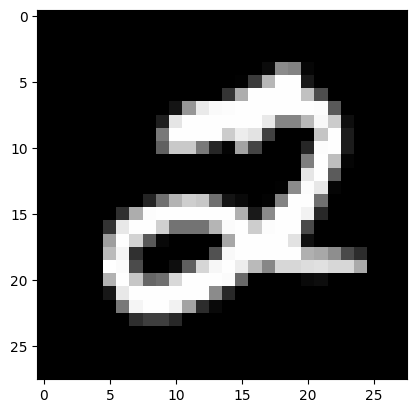

Real mark:  2
NN answer:  2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
NN output: [[2.7364138e-09 7.8356831e-13 1.9827752e-08 7.4724680e-06 1.7721488e-06
  2.3284849e-07 1.7225671e-11 2.4611420e-05 6.3226136e-05 9.9990261e-01]]


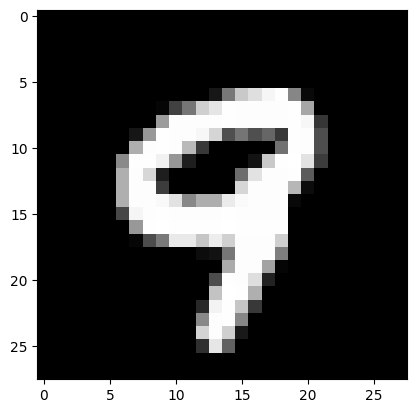

Real mark:  9
NN answer:  9


In [13]:
# вывод двух тестовых изображений и результатов распознавания

for n in [3,26]:
  result = model.predict(X_test[n:n+1])
  print('NN output:', result)

  plt.imshow(X_test[n].reshape(28,28), cmap=plt.get_cmap('gray'))
  plt.show()
  print('Real mark: ', np.argmax(y_test[n]))
  print('NN answer: ', np.argmax(result))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       997
           1       1.00      0.99      1.00      1164
           2       0.99      0.98      0.99      1030
           3       0.99      0.99      0.99      1031
           4       0.99      0.99      0.99       967
           5       0.98      0.99      0.99       860
           6       0.99      1.00      0.99       977
           7       0.98      0.99      0.99      1072
           8       0.99      0.98      0.99       939
           9       0.99      0.98      0.98       963

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



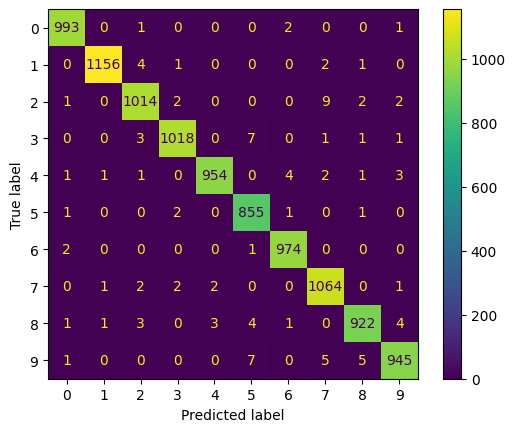

In [14]:
# истинные метки классов
true_labels = np.argmax(y_test, axis=1)
# предсказанные метки классов
predicted_labels = np.argmax(model.predict(X_test), axis=1)

# отчет о качестве классификации
print(classification_report(true_labels, predicted_labels))
# вычисление матрицы ошибок
conf_matrix = confusion_matrix(true_labels, predicted_labels)
# отрисовка матрицы ошибок в виде "тепловой карты"
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
display.plot()
plt.show()


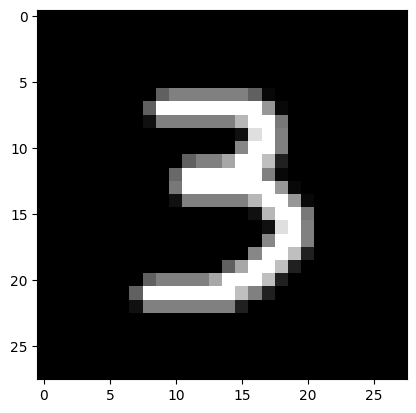

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
I think it's 3


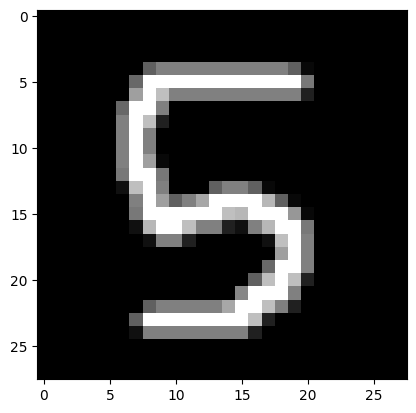

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
I think it's 5


In [15]:
# загрузка собственного изображения
from PIL import Image

for name_image in ['test3.png', 'test5.png']:
  file_data = Image.open(name_image)
  file_data = file_data.convert('L') # перевод в градации серого
  test_img = np.array(file_data)

  # вывод собственного изображения
  plt.imshow(test_img, cmap=plt.get_cmap('gray'))
  plt.show()

  # предобработка
  test_img = test_img / 255
  test_img = np.reshape(test_img, (1,28,28,1))

  # распознавание
  result = model.predict(test_img)
  print('I think it\'s', np.argmax(result))


In [16]:
model_lr1 = keras.models.load_model("best_model.keras")

model_lr1.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,062 (328.37 KB)

 Trainable params: 84,060 (328.36 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [17]:
# развернем каждое изображение 28*28 в вектор 784
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 10000,
                                                    train_size = 60000,
                                                    random_state = 23)
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels) / 255
X_test = X_test.reshape(X_test.shape[0], num_pixels) / 255
print('Shape of transformed X train:', X_train.shape)
print('Shape of transformed X train:', X_test.shape)

# переведем метки в one-hot
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('Shape of transformed y train:', y_train.shape)
print('Shape of transformed y test:', y_test.shape)


Shape of transformed X train: (60000, 784)
Shape of transformed X train: (10000, 784)
Shape of transformed y train: (60000, 10)
Shape of transformed y test: (10000, 10)


In [18]:
# Оценка качества работы модели на тестовых данных
scores = model_lr1.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9576 - loss: 0.1293
Loss on test data: 0.13758081197738647
Accuracy on test data: 0.9567000269889832


In [19]:
# загрузка датасета
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [20]:
# создание своего разбиения датасета

# объединяем в один набор
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

# разбиваем по вариантам
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 10000,
                                                    train_size = 50000,
                                                    random_state = 23)
# вывод размерностей
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)
print('Shape of X test:', X_test.shape)
print('Shape of y test:', y_test.shape)


Shape of X train: (50000, 32, 32, 3)
Shape of y train: (50000, 1)
Shape of X test: (10000, 32, 32, 3)
Shape of y test: (10000, 1)


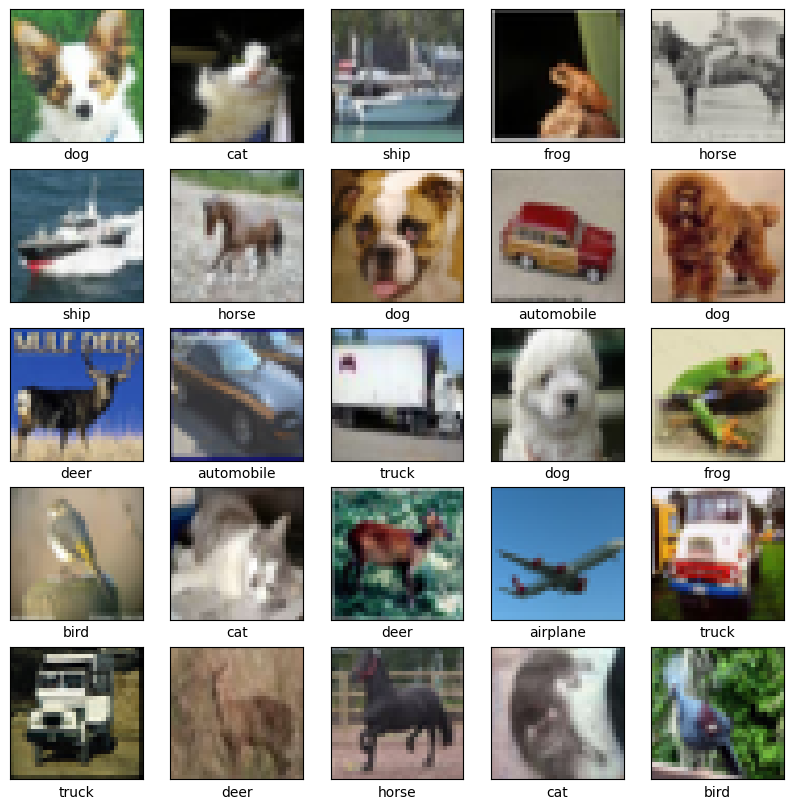

In [21]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()


In [22]:
# Зададим параметры данных и модели
num_classes = 10
input_shape = (32, 32, 3)

# Приведение входных данных к диапазону [0, 1]
X_train = X_train / 255
X_test = X_test / 255

print('Shape of transformed X train:', X_train.shape)
print('Shape of transformed X test:', X_test.shape)

# переведем метки в one-hot
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('Shape of transformed y train:', y_train.shape)
print('Shape of transformed y test:', y_test.shape)


Shape of transformed X train: (50000, 32, 32, 3)
Shape of transformed X test: (10000, 32, 32, 3)
Shape of transformed y train: (50000, 10)
Shape of transformed y test: (10000, 10)


In [23]:
# создаем модель
model = Sequential()

# Блок 1
model.add(layers.Conv2D(32, (3, 3), padding="same",
                        activation="relu", input_shape=input_shape))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Блок 2
model.add(layers.Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Блок 3
model.add(layers.Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation="softmax"))


model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,29

 Total params: 552,362 (2.11 MB)

 Trainable params: 551,466 (2.10 MB)

 Non-trainable params: 896 (3.50 KB)

In [24]:
# компилируем и обучаем модель
batch_size = 64
epochs = 50
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 0.2713 - loss: 2.0996 - val_accuracy: 0.4600 - val_loss: 1.4698
Epoch 2/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4710 - loss: 1.4611 - val_accuracy: 0.5876 - val_loss: 1.2134
Epoch 3/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5671 - loss: 1.2243 - val_accuracy: 0.6042 - val_loss: 1.2126
Epoch 4/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6242 - loss: 1.0786 - val_accuracy: 0.6838 - val_loss: 0.8650
Epoch 5/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6618 - loss: 0.9714 - val_accuracy: 0.7076 - val_loss: 0.8535
Epoch 6/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7015 - loss: 0.8811 - val_accuracy: 0.7096 - val_loss: 0.8280
Epoch 7/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7175 - loss: 0.8198 - val_accuracy: 0.7428 - val_loss: 0.7633
Epoch 8/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7368 - loss: 0.7710 - val_accurac

In [25]:
# Оценка качества работы модели на тестовых данных
scores = model.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8549 - loss: 0.5187
Loss on test data: 0.518433153629303
Accuracy on test data: 0.8521999716758728


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
NN output: [[5.0897655e-05 1.5590033e-06 1.1971882e-07 5.6473659e-10 3.7635881e-09
  1.3418226e-10 1.1458374e-08 1.3129012e-10 9.9994743e-01 1.9529903e-08]]


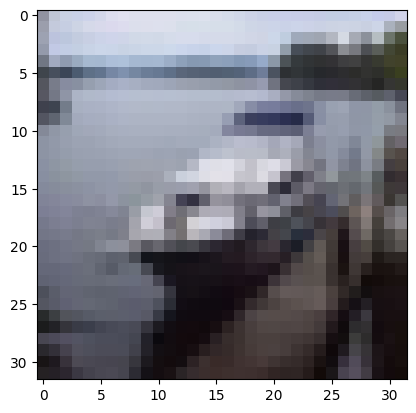

Real mark:  8
NN answer:  8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
NN output: [[3.7840240e-05 8.8557690e-06 1.5065701e-02 6.9747168e-01 3.3291127e-03
  6.2251734e-03 1.4282507e-02 2.6306707e-01 7.0983755e-05 4.4104352e-04]]


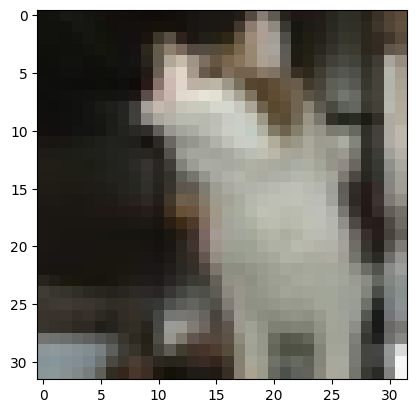

Real mark:  3
NN answer:  3


In [31]:
# вывод двух тестовых изображений и результатов распознавания

for n in [1,10]:
  result = model.predict(X_test[n:n+1])
  print('NN output:', result)

  plt.imshow(X_test[n].reshape(32,32,3), cmap=plt.get_cmap('gray'))
  plt.show()
  print('Real mark: ', np.argmax(y_test[n]))
  print('NN answer: ', np.argmax(result))


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step
              precision    recall  f1-score   support

    airplane       0.86      0.88      0.87       986
  automobile       0.94      0.93      0.94       971
        bird       0.75      0.85      0.80      1043
         cat       0.83      0.64      0.72      1037
        deer       0.78      0.90      0.83       969
         dog       0.78      0.75      0.76       979
        frog       0.83      0.92      0.87      1025
       horse       0.92      0.83      0.87       948
        ship       0.93      0.93      0.93      1003
       truck       0.94      0.90      0.92      1039

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



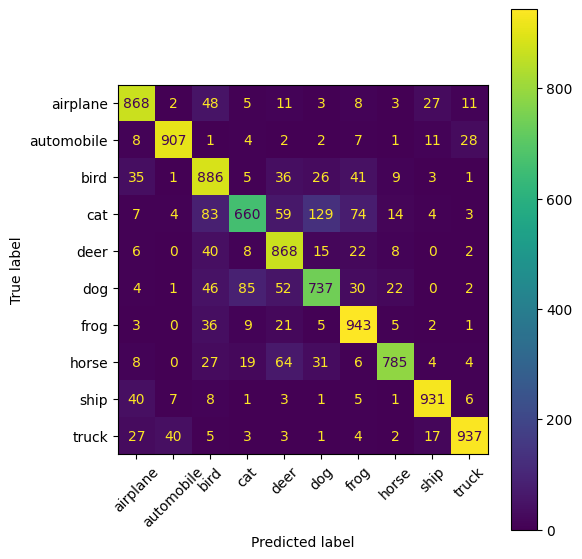

In [32]:
# истинные метки классов
true_labels = np.argmax(y_test, axis=1)
# предсказанные метки классов
predicted_labels = np.argmax(model.predict(X_test), axis=1)

# отчет о качестве классификации
print(classification_report(true_labels, predicted_labels, target_names=class_names))
# вычисление матрицы ошибок
conf_matrix = confusion_matrix(true_labels, predicted_labels)
# отрисовка матрицы ошибок в виде "тепловой карты"
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=class_names)
disp.plot(ax=ax, xticks_rotation=45)  # поворот подписей по X и приятная палитра
plt.tight_layout()  # чтобы всё влезло
plt.show()
